## Ecommerce Customer Churn Analysis and Prediction

| Column                       | Descriptions                                                    |
| --------------------------- | ---------------------------------------------------------- |
| CustomerID                  | Unique customer ID                                            |
| Churn                       | Churn Flag                                                    |
| Tenure                      | Tenure of customer in organization (Durasi Berlangganan)                            |
| PreferredLoginDevice        | Preferred login device of customer                            |
| CityTier                    | City tier                                                     |
| WarehouseToHome             | Distance in between warehouse to home of customer             |
| PreferredPaymentMode        | Preferred payment method of customer                          |
| Gender                      | Gender of customer                                            |
| HourSpendOnApp              | Number of hours spend on mobile application or website        |
| NumberOfDeviceRegistered    | Total number of deceives is registered on particular customer |
| PreferedOrderCat            | Preferred order category of customer in last month            |
| SatisfactionScore           | Satisfactory score of customer on service                     |
| MaritalStatus               | Marital status of customer                                    |
| NumberOfAddress             | Total number of added added on particular customer            |
| Complain                    | Any complaint has been raised in last month                   |
| OrderAmountHikeFromlastYear | Percentage increases in order from last year                  |
| CouponUsed                  | Total number of coupon has been used in last month            |
| OrderCount                  | Total number of orders has been places in last month          |
| DaySinceLastOrder           | Day Since last order by customer                              |
| CashbackAmount              | Average cashback in last month                                |

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 6
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

sns.set_theme(style='darkgrid')
sns.set_palette('Set1')

In [126]:
df = pd.read_excel('E Commerce Dataset.xlsx')

In [127]:
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
3773,53774,1,4.0,Phone,1,16.0,Debit Card,Male,3.0,4,Mobile Phone,5,Single,5,0,15.0,2.0,2.0,1.0,145.18
400,50401,1,0.0,Phone,3,9.0,Debit Card,Female,3.0,3,Laptop & Accessory,3,Single,10,0,14.0,1.0,2.0,0.0,145.77
73,50074,0,11.0,Mobile Phone,1,8.0,Debit Card,Male,2.0,3,Laptop & Accessory,3,Divorced,10,0,14.0,0.0,1.0,0.0,165.53
3993,53994,0,21.0,Mobile Phone,1,11.0,Debit Card,Female,4.0,5,Fashion,4,Married,10,1,13.0,3.0,15.0,NaN,228.33
2808,52809,0,4.0,Computer,1,11.0,Credit Card,Male,3.0,3,Laptop & Accessory,5,Single,1,0,19.0,1.0,1.0,7.0,199.36


### Exploratory Data Analysis

#### Descriptive Analysis

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

Semua tipe data sudah sesuai untuk masing masing kolom

In [129]:
#Split data numerik dan kategorik
num = df.select_dtypes('number').columns
kat = df.select_dtypes('object').columns

In [130]:
skew = df[num].describe().T
skew['skew'] = skew['50%'] - skew['mean']
skew

,count,mean,std,min,25%,50%,75%,max,skew
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00,0.000000
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00,-0.168384
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00,-1.189899
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00,-0.654707
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00,-1.639896
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00,0.068465
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00,0.311012
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00,-0.066785
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00,-1.214032
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00,-0.284902


In [148]:
df[kat].describe().T

,count,unique,top,freq
PreferredLoginDevice,5630,3,Mobile Phone,2765
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986


In [181]:
for i in kat:
        print(df[i].value_counts())
        print('')

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Male      3384
Female    2246
Name: Gender, dtype: int64

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64



In [183]:
print(round(df.isna().sum()/df.shape[0]*100,2))
print("\nTotal : ",round(df.isna().any(axis=1).sum()/df.shape[0]*100,2),'%')

CustomerID                     0.00
Churn                          0.00
Tenure                         4.69
PreferredLoginDevice           0.00
CityTier                       0.00
WarehouseToHome                4.46
PreferredPaymentMode           0.00
Gender                         0.00
HourSpendOnApp                 4.53
NumberOfDeviceRegistered       0.00
PreferedOrderCat               0.00
SatisfactionScore              0.00
MaritalStatus                  0.00
NumberOfAddress                0.00
Complain                       0.00
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
CashbackAmount                 0.00
dtype: float64

Total :  32.97 %


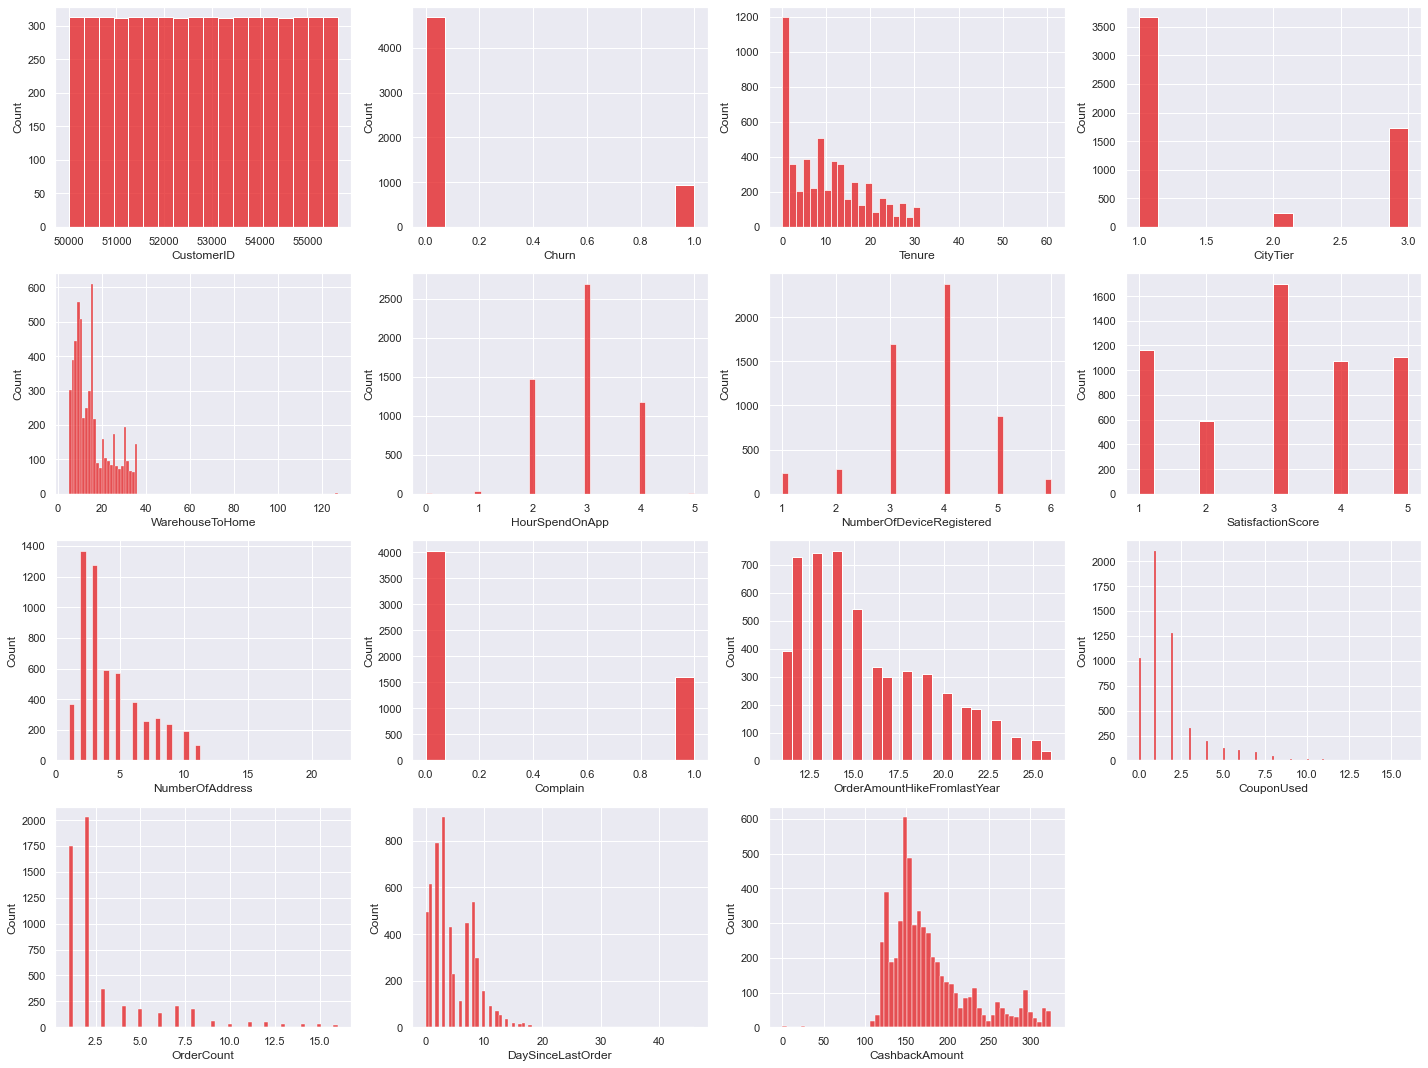

In [147]:
plt.figure(figsize=(20,15))
for i,j in enumerate(num):
        plt.subplot(4,4,i+1)
        sns.histplot(x=df[j])
        plt.tight_layout()

